2022-08-01 15:03:50,613 [INFO   ] Found DB at ./databases/default.db, appending!


WidgetBox(sizing_mode='stretch_width')
    [0] Markdown(str, sizing_mode='stretch_width')
    [1] FileInput(accept='.db', sizing_mode='stretch_width')
    [2] Button(name='Upload', sizing_mode='stretch_width')
    [3] TextInput(name='x_axis:', sizing_mode='stretch_width')
    [4] TextInput(name='y_axis:', sizing_mode='stretch_width')

2022-08-01 15:03:50,635 [INFO   ] Found DB at /Users/ecortez/Work/voila/databases/data_collection_analysis_tutorial.db, appending!
/Users/ecortez/opt/anaconda3/lib/python3.9/site-packages/aepsych/plotting.py:70: UserWarning: Threshold estimation may not be accurate for non-monotonic models.
  warnings.warn(


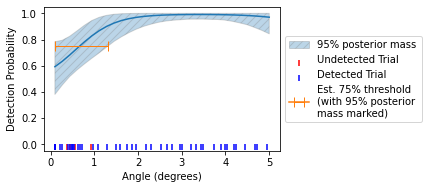

2022-08-01 15:03:50,859 [INFO   ] Starting Bokeh server version 2.4.2 (running on Tornado 6.1)
2022-08-01 15:03:50,860 [INFO   ] User authentication hooks NOT provided (default user enabled)


Launching server at http://localhost:55615


In [6]:
from aepsych.plotting import plot_strat
from aepsych.server import AEPsychServer
import panel as pn
from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets
import numpy as np
import holoviews as hv
from IPython.display import display



pn.extension(sizing_mode = 'stretch_width')
material = pn.template.MaterialTemplate(title='Interactive AEPsych')
xs = np.linspace(0, np.pi)


database_path = None
server = AEPsychServer()
strat = None



uploader = pn.widgets.FileInput(accept=".db", multiple=False)
button_upload = pn.widgets.Button(name='Upload', button_type='default')
x_axis = pn.widgets.TextInput(name='x_axis:')
y_axis = pn.widgets.TextInput(name='y_axis:')
box = pn.WidgetBox('#AEPsych', uploader, button_upload, x_axis, y_axis)
display(box)


material.sidebar.append(box)



database_path = "/Users/ecortez/Work/voila/databases/data_collection_analysis_tutorial.db"
xlabel = "Angle (degrees)"
ylabel = "Detection Probability"
yes_label = "Detected Trial"
no_label = "Undetected Trial"
target_level = 0.75
cred_level = 0.95

serv = AEPsychServer(database_path=database_path)
strat = serv.get_strat_from_replay()


material.main.append(
     pn.Row(
          pn.Card(plot_strat(strat, xlabel=xlabel, ylabel=ylabel, yes_label=yes_label, no_label=no_label, cred_level=cred_level, target_level=target_level)
                  , title='Output'),
    ),
)


material.show();